<a href="https://colab.research.google.com/github/Ashwinkpv/DSA-assignment/blob/main/digit_recognition_sym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
import random
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


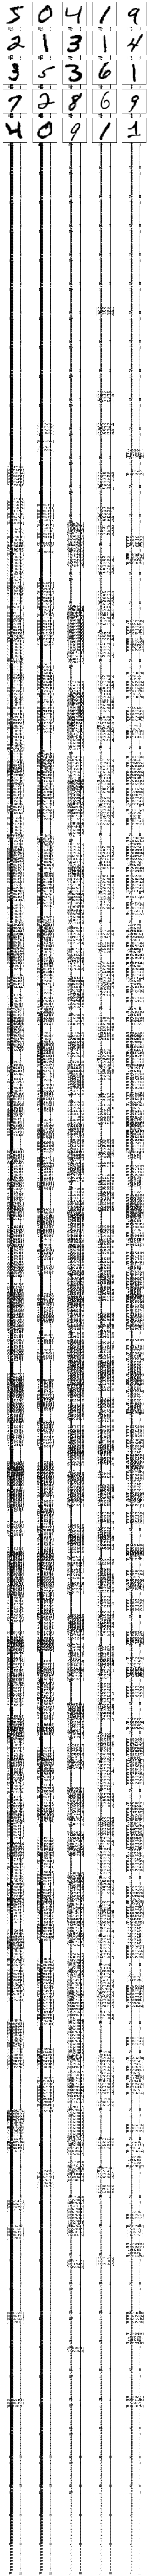

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.squeeze(x_train[i]), cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(x_train[i])
plt.show()

In [ ]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=1,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

469/469 [==============================] - 160s 338ms/step - loss: 0.1965 - accuracy: 0.9386 - val_loss: 0.0432 - val_accuracy: 0.9868
The model has successfully trained


In [ ]:
predict = model.predict(x_test)

In [ ]:
predict

array([[2.9599205e-09, 1.5845700e-09, 1.0142019e-06, ..., 9.9999821e-01,
        2.2714897e-09, 3.8117682e-07],
       [2.8444022e-06, 6.6241701e-06, 9.9998868e-01, ..., 3.9616355e-09,
        1.4753742e-07, 6.0634719e-11],
       [5.8896944e-06, 9.9694949e-01, 5.0587370e-04, ..., 1.9357542e-03,
        2.3672411e-04, 3.9355386e-06],
       ...,
       [4.1105483e-09, 2.8266625e-08, 6.9364745e-09, ..., 2.6755670e-06,
        4.0104314e-06, 1.9689909e-05],
       [5.7366913e-07, 3.7490850e-08, 6.0289032e-09, ..., 2.6885050e-07,
        1.1568339e-04, 3.9184644e-07],
       [4.4196400e-07, 6.8856274e-08, 6.1818860e-06, ..., 1.1000567e-09,
        1.6453490e-07, 2.1031362e-08]], dtype=float32)

In [ ]:
import numpy as np
pred = np.argmax(predict,axis=1)
pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(x_test,pred)
acc

In [ ]:
plt.figure(figsize=(25,25))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.squeeze(x_test[i]), cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(pred[i])
plt.show()

In [ ]:
from google.colab import files
up = files.upload()

In [ ]:
import cv2
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# read image
image = cv2.imread("img 5.png")
img = load_img("img 5.png", grayscale=True, target_size=(28, 28))

# image preprocessing
img = img_to_array(img)
img = img.reshape(1, 28, 28,1 )
img = img.astype('float32')
img = img / 255.0
#print(image.shape)

# predction
res = model.predict(img)
result = np.argmax(res,axis=1)

# display image with prediction
plt.imshow(image)
plt.xlabel("Prediction : "+ str(result[0]),fontsize=18)
plt.xticks([])
plt.yticks([])
plt.show()